In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from skimage.measure import label, regionprops

In [2]:
df_track_outp = pd.read_csv('../example_data/Pos57/TXRED/track_output/track_output.csv', index_col = 'Unnamed: 0')

In [3]:
hf_track_outp = h5py.File('../example_data/Pos57/TXRED/track_output/label_stack.h5', 'r')
hf_track_outp.keys()
label_stack = np.array(hf_track_outp.get('label_stack'))
hf_track_outp.close()

## Cell life cycle

Text(0.5, 1.0, 'Cell life cycle')

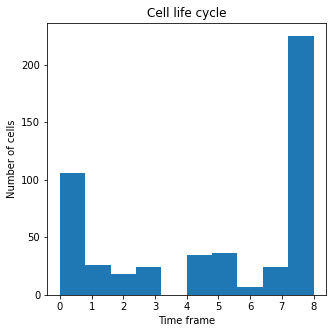

In [4]:
life_cycle = df_track_outp['last_frame'] - df_track_outp['first_frame']
plt.figure(figsize=(5,5))
plt.hist(life_cycle)
plt.xlabel('Time frame')
plt.ylabel('Number of cells')
plt.title('Cell life cycle')

## Cell area

Text(0, 0.5, 'Cell Area')

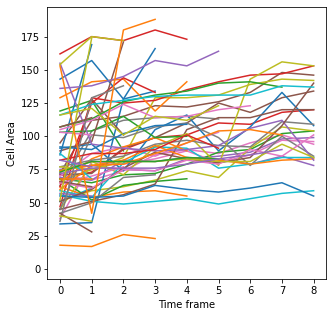

In [5]:
cell_ids = np.unique(df_track_outp['trackID'])

plt.figure(figsize=(5,5))
for c in cell_ids:
    plt.plot(df_track_outp[df_track_outp['trackID'] == c].area.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Area')

## Cell length

Text(0, 0.5, 'Cell Length (major axis)')

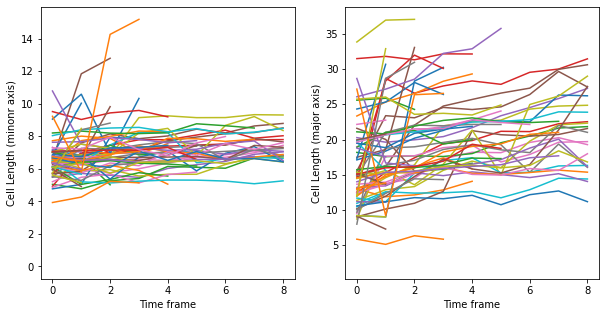

In [6]:
cell_ids = np.unique(df_track_outp['trackID'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
for c in cell_ids:
    plt.plot(df_track_outp[df_track_outp['trackID'] == c].minor_axis_length.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Length (minonr axis)')

plt.subplot(1,2,2)
for c in cell_ids:
    plt.plot(df_track_outp[df_track_outp['trackID'] == c].major_axis_length.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Length (major axis)')

## Mean intensity

Text(0, 0.5, 'Cell Area')

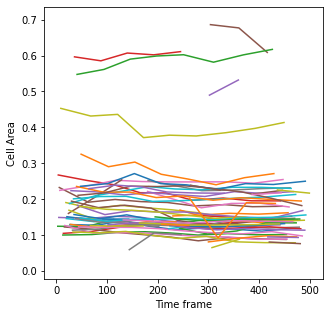

In [7]:
cell_ids = np.unique(df_track_outp['trackID'])

plt.figure(figsize=(5,5))
for c in cell_ids:
    plt.plot(df_track_outp[df_track_outp['trackID'] == c].intensity_mean)
plt.xlabel('Time frame')
plt.ylabel('Cell Area')

## Lineage

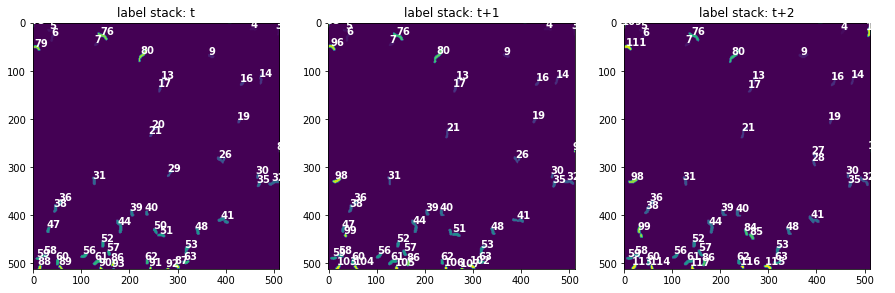

In [8]:
plt.figure(figsize = (15,5))
ax = plt.subplot(1,3,1)
img = np.array(label_stack)[1]
plt.imshow(img)
plt.title('label stack: t')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
ax = plt.subplot(1,3,2)
img = np.array(label_stack)[2]
plt.imshow(img)
plt.title('label stack: t+1')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
ax = plt.subplot(1,3,3)
img = np.array(label_stack)[3]
plt.imshow(img)
plt.title('label stack: t+2')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')